# Exploratory Data Analysis of Similarity Data

In [45]:
# Import necessary libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random, itertools as it
import pandas as pd
import numpy as np
import seaborn as sns

## Similarity Distribution Over Varying Graph Sizes

In [46]:
dist_1 = pd.read_csv("Experiment - Graph Size Distribution/Data/graph-size-dist-20-10-41-10.csv", header=[0, 1], index_col=[0,1])
dist_2 = pd.read_csv("Experiment - Graph Size Distribution/Data/graph-size-dist-10-70-101-10.csv", header=[0, 1], index_col=[0,1])
dist_2.head()

Edit-Distance Immediate Similarity  \
                                                                         mean   
Number of Nodes Per Graph Number of Graphs                                      
70                        10                                         0.374622   
80                        10                                         0.365455   
90                        10                                         0.371920   
100                       10                                         0.373796   

                                                                \
                                                 50%       std   
Number of Nodes Per Graph Number of Graphs                       
70                        10                0.378173  0.054223   
80                        10                0.356353  0.031500   
90                        10                0.375763  0.036006   
100                       10                0.374148  0.036719   

                                           Edit-Distance Full Similarity  \
                                                                    mean   
Number of Nodes Per Graph Number of Graphs                                 
70                        10                                    0.452240   
80                        10                                    0.440886   
90                        10                                    0.435935   
100                       10                                    0.442686   

                                                                \
                                                 50%       std   
Number of Nodes Per Graph Number of Graphs                       
70                        10                0.445559  0.042189   
80                        10                0.446142  0.039364   
90                        10                0.439146  0.019060   
100                       10                0.449974  0.039849   

                                           Jaccard Index Similarity            \
                                                               mean       50%   
Number of Nodes Per Graph Number of Graphs                                      
70                        10                               0.034452  0.036431   
80                        10                               0.037367  0.038063   
90                        10                               0.029177  0.029486   
100                       10                               0.032939  0.029126   

                                                      \
                                                 std   
Number of Nodes Per Graph Number of Graphs             
70                        10                0.015623   
80                        10                0.017089   
90                        10                0.010049   
100                       10                0.009890   

                                           Longest Maximal Independent Set  \
                                                                      mean   
Number of Nodes Per Graph Number of Graphs                                   
70                        10                                          49.1   
80                        10                                          56.1   
90                        10                                          63.2   
100                       10                                          70.1   

                                                            \
                                             50%       std   
Number of Nodes Per Graph Number of Graphs                   
70                        10                49.0  2.024846   
80                        10                56.5  2.558211   
90                        10                63.5  1.398412   
100                       10                70.0  1.791957   

                                           Number of Maximal Cliques  \
 

In [47]:
distributions = [dist_1, dist_2]

dist = pd.concat(distributions)

In [48]:
dist["Edit-Distance Immediate Similarity"]["mean"]

Number of Nodes Per Graph  Number of Graphs
10                         20                  0.459189
20                         20                  0.432411
30                         20                  0.395798
40                         20                  0.390805
70                         10                  0.374622
80                         10                  0.365455
90                         10                  0.371920
100                        10                  0.373796
Name: mean, dtype: float64

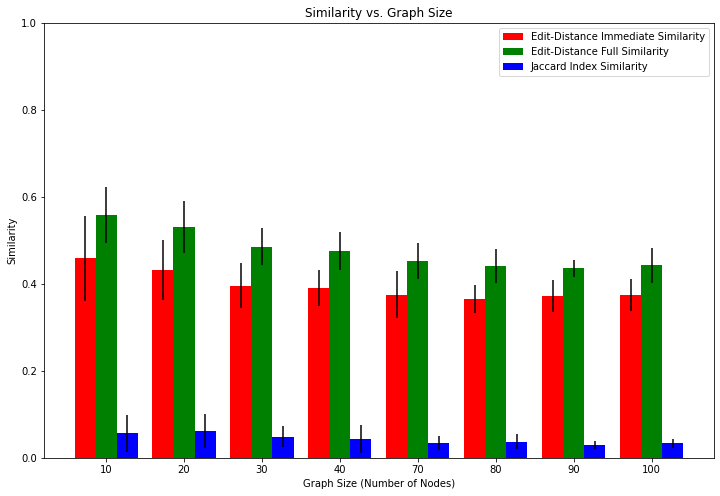

In [58]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)

ed_imm_sim = list(dist["Edit-Distance Immediate Similarity"]["mean"])
ed_f_sim = list(dist["Edit-Distance Full Similarity"]["mean"])
ji_sim = list(dist["Jaccard Index Similarity"]["mean"])

ed_imm_sim_std = list(dist["Edit-Distance Immediate Similarity"]["std"])
ed_f_sim_std = list(dist["Edit-Distance Full Similarity"]["std"])
ji_sim_std = list(dist["Jaccard Index Similarity"]["std"])

# Adapted from https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars
N = len(ed_imm_sim)
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars
index_1_list = [value_pair[0] for value_pair in dist.index.values.tolist()]

# ed_imm_sim = dist["Edit-Distance Immediate Similarity"]["mean"]
# ed_f_sim = dist["Edit-Distance Full Similarity"]["mean"]
# ji_sim = dist["Jaccard Index Similarity"]["mean"]

# ed_imm_sim_std = dist["Edit-Distance Immediate Similarity"]["std"]
# ed_f_sim_std = dist["Edit-Distance Full Similarity"]["std"]
# ji_sim_std = dist["Jaccard Index Similarity"]["std"]

# print(ji_sim_std.shape == ji_sim.shape)
# print(len(ed_imm_sim) == len(ji_sim_std))

rects1 = ax.bar(ind, ed_imm_sim, width, color='r', yerr=ed_imm_sim_std)
rects2 = ax.bar(ind + width, ed_f_sim, width, color='g', yerr=ed_f_sim_std)
rects3 = ax.bar(ind + width * 2, ji_sim, width, color='b', yerr=ji_sim_std)

ax.set_ylabel('Similarity')
ax.set_xlabel("Graph Size (Number of Nodes)")
ax.set_xticks(ind + width)
ax.set_xticklabels(index_1_list)
ax.legend((rects1[0], rects2[0], rects3[0]), ('Edit-Distance Immediate Similarity', 'Edit-Distance Full Similarity', 'Jaccard Index Similarity'))
ax.set_ylim(0, 1)
ax.set_title("Similarity vs. Graph Size")

plt.savefig("Experiment - Graph Size Distribution/graph-size-dist.png")

plt.show()

#### Other Work

### Distribution of Similarity Over Random Graphs of Constant Size

In [61]:
dist = pd.read_csv("Experiment - Similarity Distribution/Data/sim-dist-25-40-60.csv", header=[0, 1], index_col=[0])
dist.tail()


Edit-Distance Immediate Similarity                 \
                                           mean  50%       std   
Graph Number                                                     
20                                     0.263564  0.0  0.433207   
21                                     0.315984  0.0  0.457199   
22                                     0.263823  0.0  0.434073   
23                                     0.293479  0.0  0.445915   
24                                     0.338385  0.0  0.465742   

             Edit-Distance Full Similarity                      \
                                      mean       50%       std   
Graph Number                                                     
20                                0.549674  0.719504  0.426068   
21                                0.514476  0.681944  0.446907   
22                                0.509785  0.544117  0.418029   
23                                0.527106  0.661867  0.446131   
24                                0.545148  0.751289  0.448401   

             Jaccard Index Similarity                 \
                                 mean  50%       std   
Graph Number                                           
20                           0.201493  0.0  0.283813   
21                           0.103524  0.0  0.193676   
22                           0.117433  0.0  0.187031   
23                           0.131428  0.0  0.219272   
24                           0.123761  0.0  0.244871   

             Longest Maximal Independent Set             \
                                        mean   50%  std   
Graph Number                                              
20                                      23.0  23.0  0.0   
21                                      27.0  27.0  0.0   
22                                      23.0  23.0  0.0   
23                                      27.0  27.0  0.0   
24                                      24.0  24.0  0.0   

             Number of Maximal Cliques               Longest Maximal Clique  \
                                  mean      50%  std                   mean   
Graph Number                                                                  
20                             37440.0  37440.0  0.0                    3.0   
21                             37440.0  37440.0  0.0                    2.0   
22                             37440.0  37440.0  0.0                    2.0   
23                             40560.0  40560.0  0.0                    3.0   
24                             39000.0  39000.0  0.0                    3.0   

                        
              50%  std  
Graph Number            
20            3.0  0.0  
21            2.0  0.0  
22            2.0  0.0  
23            3.0  0.0  
24            3.0  0.0

In [31]:
main_col_list = list({col_pair[0] for col_pair in dist.columns})
mean_data = {}

for col in main_col_list:
    mean_data[col] = dist[(col, "mean")]

mean_dist = pd.DataFrame(data = mean_data)    

In [32]:
mean_dist.head()

,Edit-Distance Immediate Similarity,Edit-Distance Full Similarity,Longest Maximal Independent Set,Longest Maximal Clique,Jaccard Index Similarity,Number of Maximal Cliques
Graph Number,,,,,,
0,0.246028,0.476010,27.0,2.0,0.131491,35880.0
1,0.317401,0.470919,31.0,3.0,0.072276,35880.0
2,0.221097,0.624605,26.0,2.0,0.265402,39000.0
3,0.266765,0.517063,26.0,3.0,0.183638,35880.0
4,0.192601,0.611431,28.0,2.0,0.277664,37440.0


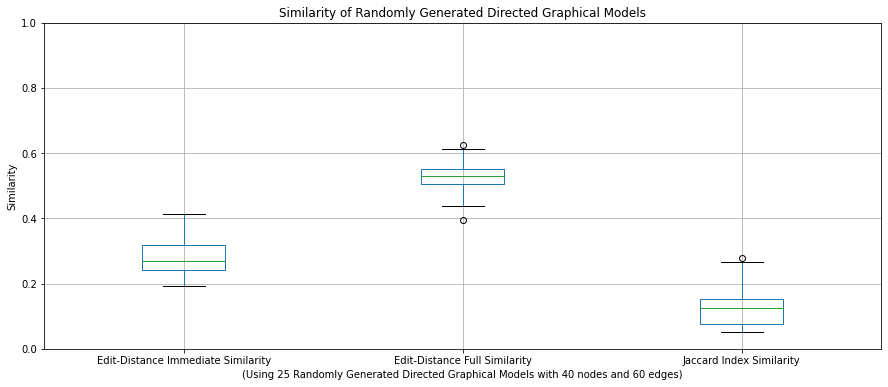

In [41]:
mean_dist.boxplot(column=["Edit-Distance Immediate Similarity", "Edit-Distance Full Similarity", 'Jaccard Index Similarity'], figsize = (15,6), return_type = "axes")

plt.ylabel("Similarity")
plt.xlabel("(Using 25 Randomly Generated Directed Graphical Models with 40 nodes and 60 edges)")
plt.title("Similarity of Randomly Generated Directed Graphical Models")
plt.ylim(0, 1)
plt.savefig('Experiment - Similarity Distribution/sim-dist.png')

### Similarity Distribution Over Edge Factor

In [59]:
dist = pd.read_csv("Experiment - Edges Factor/Data/edges-factor-dist-10-40-1-3.1-0.5.csv", header=[0, 1], index_col=[0,1])
dist.head()

Edit-Distance Immediate Similarity  \
                                                                         mean   
Number of Nodes Per Graph Number of Graphs                                      
10                        20                                         0.459189   
20                        20                                         0.432411   
30                        20                                         0.395798   
40                        20                                         0.390805   

                                                                \
                                                 50%       std   
Number of Nodes Per Graph Number of Graphs                       
10                        20                0.442889  0.097496   
20                        20                0.463915  0.069378   
30                        20                0.382940  0.051046   
40                        20                0.386320  0.042076   

                                           Edit-Distance Full Similarity  \
                                                                    mean   
Number of Nodes Per Graph Number of Graphs                                 
10                        20                                    0.558601   
20                        20                                    0.531011   
30                        20                                    0.485745   
40                        20                                    0.475337   

                                                                \
                                                 50%       std   
Number of Nodes Per Graph Number of Graphs                       
10                        20                0.566127  0.064987   
20                        20                0.544464  0.059214   
30                        20                0.489263  0.043550   
40                        20                0.465924  0.043786   

                                           Jaccard Index Similarity            \
                                                               mean       50%   
Number of Nodes Per Graph Number of Graphs                                      
10                        20                               0.056415  0.046594   
20                        20                               0.060767  0.047980   
30                        20                               0.048816  0.048568   
40                        20                               0.042202  0.025165   

                                                      \
                                                 std   
Number of Nodes Per Graph Number of Graphs             
10                        20                0.042578   
20                        20                0.039059   
30                        20                0.023582   
40                        20                0.032114   

                                           Longest Maximal Independent Set  \
                                                                      mean   
Number of Nodes Per Graph Number of Graphs                                   
10                        20                                          7.35   
20                        20                                         14.00   
30                        20                                         20.65   
40                        20                                         28.40   

                                                            \
                                             50%       std   
Number of Nodes Per Graph Number of Graphs                   
10                        20                 7.0  0.933302   
20                        20                14.0  1.025978   
30                        20                20.5  1.308877   
40                        20                28.0  1.535544   

                                           Number of Maximal Cliques     

In [ ]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)

ed_imm_sim = list(dist["Edit-Distance Immediate Similarity"]["mean"])
ed_f_sim = list(dist["Edit-Distance Full Similarity"]["mean"])
ji_sim = list(dist["Jaccard Index Similarity"]["mean"])

ed_imm_sim_std = list(dist["Edit-Distance Immediate Similarity"]["std"])
ed_f_sim_std = list(dist["Edit-Distance Full Similarity"]["std"])
ji_sim_std = list(dist["Jaccard Index Similarity"]["std"])

# Adapted from https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars
N = len(ed_imm_sim)
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars
index_1_list = [value_pair[0] for value_pair in dist.index.values.tolist()]

# ed_imm_sim = dist["Edit-Distance Immediate Similarity"]["mean"]
# ed_f_sim = dist["Edit-Distance Full Similarity"]["mean"]
# ji_sim = dist["Jaccard Index Similarity"]["mean"]

# ed_imm_sim_std = dist["Edit-Distance Immediate Similarity"]["std"]
# ed_f_sim_std = dist["Edit-Distance Full Similarity"]["std"]
# ji_sim_std = dist["Jaccard Index Similarity"]["std"]

# print(ji_sim_std.shape == ji_sim.shape)
# print(len(ed_imm_sim) == len(ji_sim_std))

rects1 = ax.bar(ind, ed_imm_sim, width, color='r', yerr=ed_imm_sim_std)
rects2 = ax.bar(ind + width, ed_f_sim, width, color='g', yerr=ed_f_sim_std)
rects3 = ax.bar(ind + width * 2, ji_sim, width, color='b', yerr=ji_sim_std)

ax.set_ylabel('Similarity')
ax.set_xlabel("Nodes To Edges Factor")
ax.set_xticks(ind + width)
ax.set_xticklabels(index_1_list)
ax.legend((rects1[0], rects2[0], rects3[0]), ('Edit-Distance Immediate Similarity', 'Edit-Distance Full Similarity', 'Jaccard Index Similarity'))
ax.set_ylim(0, 1)
ax.set_title("Similarity vs. Nodes To Edges Factor")

plt.savefig("Experiment - Edges Factor/edges-factor-dist.png")

plt.show()